Key things to do:
- make plt.imshow() plots over a grid of baselines from -50 to +50 m in x and y
- with a single point source, look at visibility as a function baseline vector, both real/imag and abs/angle
- try varying point source position, try varying the frequency
- try adding multiple sources with same/different flux
- bonus: try doing a 2D FFT of your grid
- pick frequency between 100 and 200 MHz
- start with "unit beam" = 1
- can also try Gaussian beam with some scale width from the zenith

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5,1,'Imaginary Values vs. Magnitudes')

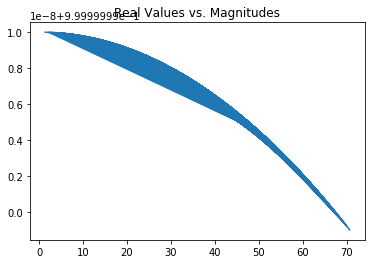

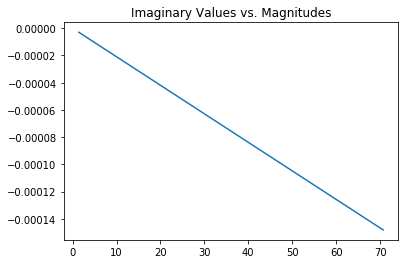

In [2]:
# assumptions: 
# simple unit beam (Bij = 1)
# Intensity as a Dirac Delta function, which "cancels out" the integral and picks out a specific frequency (nu). 
# Thus, Vtrue should just be an exponential function of the frequency, with a dependence on the baseline vector.
# The baseline vector (non-unit) in spherical coordinates has strictly theta = pi/2 and variable other components, 
# while I define the r-hat as r=1 and having theta = 0, phi = 0. If we dot *any* b and r-hat, the dot product is just 
# |b|, which seems incorrect but I've used that below.
def Vsimple(nu, b):
    c = 3*10**8
    flux = 1
    return flux*np.exp(-2*np.pi*1j*(nu/c)*b)



# grid of 100 by 100 points that represent the antennae:
grid = []
for i in range(-50,51):
    for j in range(-50,51):
        point = [i,j]
        grid.append(point)

# use distance formula to find the magnitude from each point to all the other points. Because of the assumptions above,
# b dot r-hat is just the magnitude of the distances
def distance(p1, p2):
    return np.sqrt(((p1[0]-p2[0])**2) + (p1[1]-p2[1])**2)

# ## This code below crashes the notebook because it's too many calculations 
# mags = []
# for k in range(len(grid)):
#     for n in range(len(grid)):
#         if k != n:
#             mags.append(distance(grid[k],grid[n]))
# print("mags")
# print(mags)

# If I calculate the distances relative to one point (0,0) (which is grid[5100] in this case), there would be a lot 
# less points. Additionally, because (0,0) is at the center of the grid, we can calculate the magnitudes for just 
# one quadrant due to symmetry. These magnitudes are collected using the +x and +y quadrant.
mags = []
for k in range(len(grid)):
    if (grid[k][0] > 0) and (grid[k][1] > 0):
        mags.append(distance(grid[k],grid[5100]))

# Now with the list of magnitudes, we plug them into Vsimple:
nu = 100 # MHz
realVals = []
imVals = []
for m in range(len(mags)):
    realVals.append((Vsimple(nu, mags[m])).real)
    imVals.append((Vsimple(nu, mags[m])).imag)
    
# Plotting:
# Not sure how to visualize as a grid; I'm assuming I need to evaluate every point, but I've only done so for (0,0).
plt.figure()
plt.plot(mags, realVals)
plt.title("Real Values vs. Magnitudes")

plt.figure()
plt.plot(mags, imVals)
plt.title("Imaginary Values vs. Magnitudes")


- vectorizing calculations in numpy (put things in numpy arrays rather than just lists)
- use docstrings
- use shift tab
- learn np.meshgrid, for real this time


[[-50 -50   0]
 [-49 -50   0]
 [-48 -50   0]
 ...
 [ 48  50   0]
 [ 49  50   0]
 [ 50  50   0]]


<IPython.core.display.Javascript object>


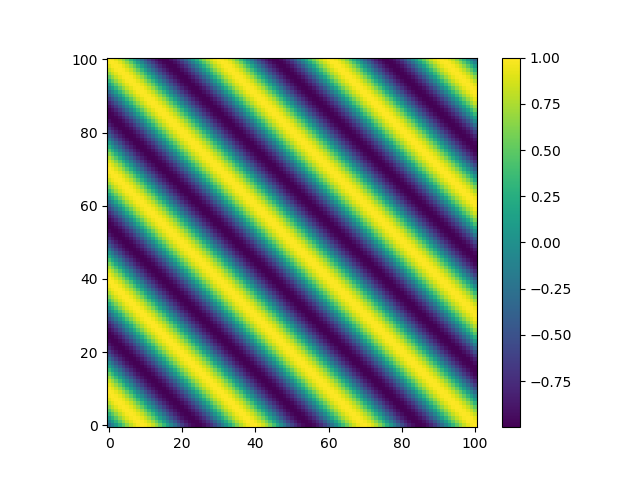

In [9]:
import numpy as np
import matplotlib.pyplot as plt
def Vsimple(nu, b, r):
    ''' frequency in Hz
     normalizes r vector
     '''
    c = 3*10**8
    flux = 1
    r /= np.linalg.norm(r)
    return flux*np.exp(-2*np.pi*1j*(nu/c)*np.dot(b,r))


r = np.array([0.1, 0.1, 1])
b = np.array([1,50,0])
# np.linalg.norm(r) gives us the magnitude of the vector, and to normalize we divide it through like this:
# where "r /= a" is really "r = r/a"
r /= np.linalg.norm(r)

# Vsimple(1e8, b, r)
# freqs = np.linspace(1e8, 2e8, 100)
# Vsimple(freqs, b, r)

### Key part:
baselines = np.array(np.meshgrid(np.arange(-50,51), np.arange(-50,51), [0]))
baselines = baselines.reshape(3,-1).T
print(baselines)

allV = np.array([Vsimple(1e8, b, r) for b in baselines]).reshape(101,101)

%matplotlib notebook
plt.imshow(allV.real,origin='lower')
plt.colorbar()
plt.show()

In [4]:
type(np.arange(-50,51,1))

numpy.ndarray

<IPython.core.display.Javascript object>


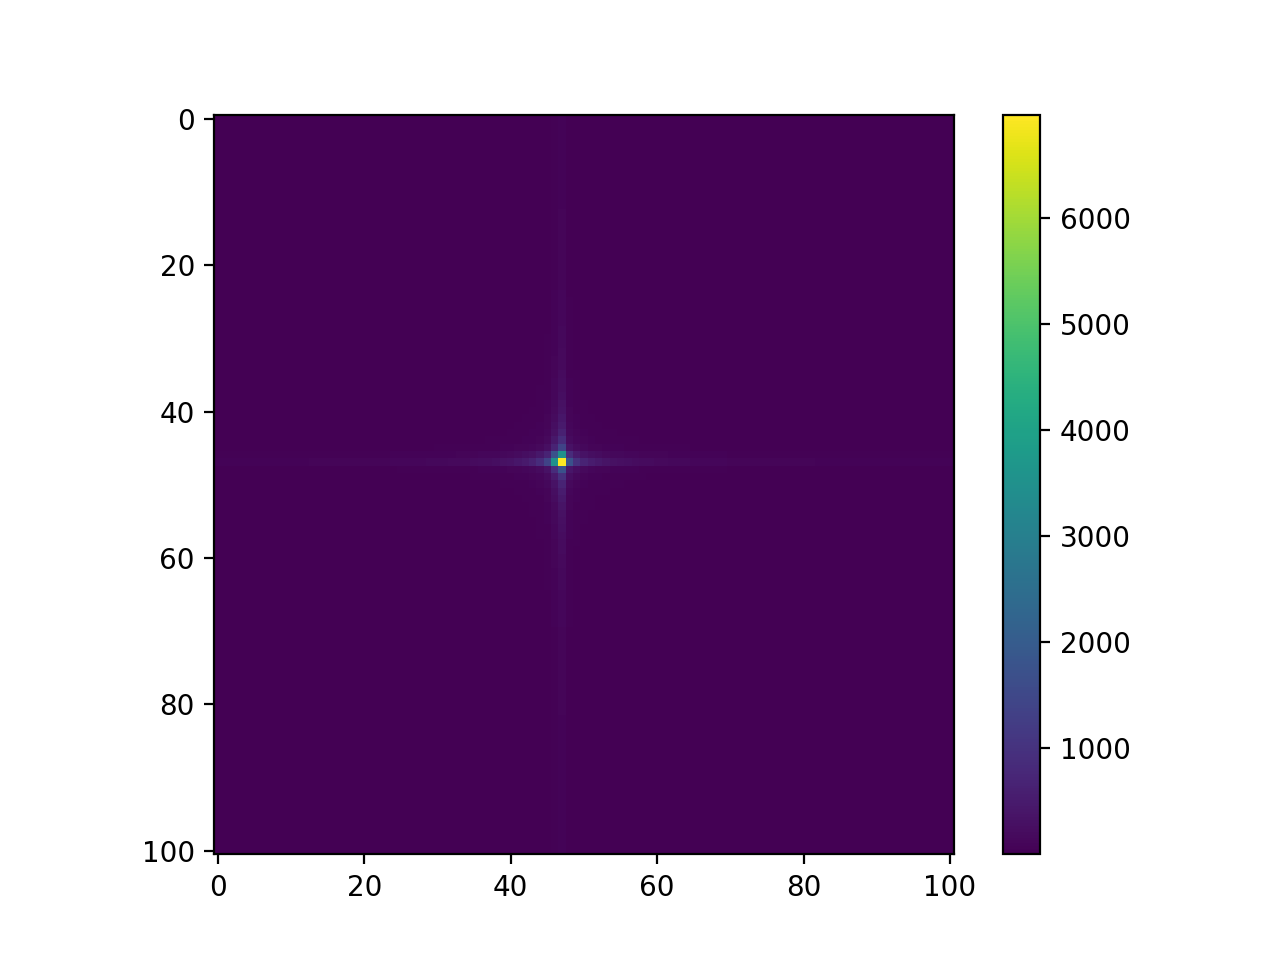

In [5]:
plt.figure()
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(allV))))
plt.colorbar()
plt.show()
